In [27]:
# Dependencies
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
import time
import datetime
from iex import Stock

#import config 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [28]:
# Twitter API Keys
consumer_key = "rEHjAMU0Srd1zNNzj24cAu2Od"
consumer_secret = "QGULbDQWFfG2U0JKR8px2K1uO5e6axvTtiJ491MhHA2xIYbAsS"
access_token = "2560678537-ErGKl2Ct61tnywxITovHtBPraZrlcnM0IBqDmoG"
access_token_secret = "cHdDA6vdA1Zzn7Is7poAis1yckA9wSSqDzvNBjSvOv78b"

# Twitter credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [29]:
# Create columns for dataframe
tweets_table = {'Tweet Number': '',
              'Tweet': '',
              'Compound Score': '',
              'Positive Score': '',
              'Negative Score': '',
              'Neutral Score': ''}

In [30]:
# Create list of news accounts
target_terms = ['@ElonMusk']

In [31]:
# Variable to hold list of the compound sentiment
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_number = []
text = []
created =[]
retweet = []

# Loop through all target users
for target in target_terms:
        
    # Run search around each tweet(Upto max of 200 tweets at once)
    screen_name = target
    public_tweets = api.user_timeline(target,
                                      count=200,result_type ="recent")
    
    # Index to see how many tweets for each news source
    index = 0
        
    # Loop through all tweets
    for tweet in public_tweets:
        
        news_organization = target
            
        # Run vader analysis on each tweet
        scores = analyzer.polarity_scores(tweet['text'])
        compound = scores['compound']
        pos = scores['pos']
        neu = scores['neu']
        neg = scores['neg']
            
        # Add value to list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        text.append(tweet['text'])
        tweet_number.append(index)
        tweet_date = datetime.datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
        convert_time = datetime.datetime.strftime(tweet_date, '%m/%d/%y')
        created.append(convert_time)
        retweet.append(tweet["retweet_count"])
        index = index + 1
        

In [32]:
len(public_tweets)

200

In [59]:
# Add values from list to dataframe
tweets_table['Tweet Number'] = tweet_number
tweets_table['Tweet'] = text

tweets_table['Compound Score'] = compound_list
tweets_table['Positive Score'] = positive_list
tweets_table['Negative Score'] = negative_list
tweets_table['Neutral Score'] = neutral_list
tweets_table['date'] = created
tweets_table['Retweet'] = retweet
tweets_table = pd.DataFrame(tweets_table)
tweets_table.to_csv('sentimentsnewsmedia.csv')
tweets_table.drop(tweets_table.index[130:200],inplace=True)
tweets_table.tail()

ValueError: Length of values does not match length of index

In [60]:
#Stock Data 

tsla = Stock("TSLA")
tsla.book()

https://api.iextrading.com/1.0/stock/TSLA/book


{'quote': {'symbol': 'TSLA',
  'companyName': 'Tesla Inc.',
  'primaryExchange': 'Nasdaq Global Select',
  'sector': 'Consumer Cyclical',
  'calculationPrice': 'close',
  'open': 264.52,
  'openTime': 1539005400533,
  'close': 250.56,
  'closeTime': 1539028800417,
  'high': 267.76,
  'low': 249,
  'latestPrice': 250.56,
  'latestSource': 'Close',
  'latestTime': 'October 8, 2018',
  'latestUpdate': 1539028800417,
  'latestVolume': 13116761,
  'iexRealtimePrice': 250.525,
  'iexRealtimeSize': 2,
  'iexLastUpdated': 1539028796566,
  'delayedPrice': 250.56,
  'delayedPriceTime': 1539028800417,
  'extendedPrice': 253.27,
  'extendedChange': 2.71,
  'extendedChangePercent': 0.01082,
  'extendedPriceTime': 1539032389195,
  'previousClose': 261.95,
  'change': -11.39,
  'changePercent': -0.04348,
  'iexMarketPercent': 0.03532,
  'iexVolume': 463284,
  'avgTotalVolume': 10324015,
  'iexBidPrice': 0,
  'iexBidSize': 0,
  'iexAskPrice': 0,
  'iexAskSize': 0,
  'marketCap': 42743818161,
  'peRati

In [61]:
#TSLA Data for the past year

tsla_df = tsla.chart_table(range='6m')
tsla_df.tail()

https://api.iextrading.com/1.0/stock/TSLA/chart/6m


,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
124,45.93,0.016289,17.347,310.70,2018-10-01,311.44,Oct 1,301.05,305.77,21777597,21777597,307.6083
125,-9.68,-0.015374,-3.116,301.02,2018-10-02,316.84,Oct 2,299.15,313.95,11743511,11743511,306.3166
126,-6.22,-0.035719,-2.066,294.80,2018-10-03,304.60,Oct 3,291.57,303.33,7994988,7994988,295.9612
127,-12.97,-0.078143,-4.400,281.83,2018-10-04,294.00,Oct 4,277.67,293.95,9814212,9814212,283.1426
128,-19.88,-0.143170,-7.054,261.95,2018-10-05,274.88,Oct 5,260.00,274.65,17944537,17944537,265.4947


In [62]:
sort= tsla_df.sort_values("date", ascending = False)
sorted_tsla_df= sort.reset_index(drop= True)
sorted_tsla_df.tail()

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
124,-3.77,-0.015668,-1.237,300.93,2018-04-11,308.98,"Apr 11, 18",299.66,300.7403,7482945,7482945,304.1817
125,15.04,-0.003336,5.192,304.70,2018-04-10,307.10,"Apr 10, 18",293.68,298.9700,11024259,11024259,302.6414
126,-9.64,-0.052532,-3.221,289.66,2018-04-09,309.50,"Apr 9, 18",289.21,300.3700,10249805,10249805,299.7052
127,-6.42,-0.021000,-2.100,299.30,2018-04-06,309.28,"Apr 6, 18",295.50,301.0000,13520286,13520286,301.6267
128,18.78,0.000000,6.545,305.72,2018-04-05,306.26,"Apr 5, 18",288.20,289.3400,19121101,19121101,298.5066


In [63]:
tweets_table.shape
tweets_table["Compound Score(Millions)"] = tweets_table["Compound Score"]*10000000
tweets_table["Compound Score(Thousands)"] = tweets_table["Compound Score"]*10000
tweets_table["Compound Score(Hundreds)"] = tweets_table["Compound Score"]*100
tweets_table["Compound Score(Tens)"] = tweets_table["Compound Score"]*10
tweets_table.tail()

,Tweet Number,Tweet,Compound Score,Positive Score,Negative Score,Neutral Score,date,Retweet,Compound Score(Millions),Compound Score(Thousands),Compound Score(Hundreds),Compound Score(Tens)
125,125,@JamesMarstersOf @bioshock Always,0.0000,0.000,0.0,1.000,09/18/18,18,0.0,0.0,0.00,0.000
126,126,@sleepingromi @yousuck2020 @rogerwaters @Space...,0.4019,0.351,0.0,0.649,09/18/18,78,4019000.0,4019.0,40.19,4.019
127,127,@yousuck2020 @SpaceX That’s the first BFR airf...,0.0000,0.000,0.0,1.000,09/18/18,314,0.0,0.0,0.00,0.000
128,128,@MKBHD Yeah … that’s exactly how I feel. Howev...,0.6249,0.317,0.0,0.683,09/18/18,1042,6249000.0,6249.0,62.49,6.249
129,129,"RT @yousuck2020: I choose to go to the moon, w...",0.0000,0.000,0.0,1.000,09/18/18,8752,0.0,0.0,0.00,0.000


In [64]:
final_dict= {"Change" : index["change"],
             "Perecentage Change" :index["changePercent"],
            "Close" : index["close"],
            "Open": tsla_df["open"],
            "Stock_Date": index["date"],
            "Tweet": tweets_table["Tweet"],
            "Compound":tweets_table["Compound Score"],
            "Tweet_Date_Time": tweets_table["date"]}
final_df = pd.DataFrame(final_dict)
final_df.tail()

,Change,Perecentage Change,Close,Open,Stock_Date,Tweet,Compound,Tweet_Date_Time
125,15.04,5.192,304.70,313.95,2018-04-10,@JamesMarstersOf @bioshock Always,0.0000,09/18/18
126,-9.64,-3.221,289.66,303.33,2018-04-09,@sleepingromi @yousuck2020 @rogerwaters @Space...,0.4019,09/18/18
127,-6.42,-2.100,299.30,293.95,2018-04-06,@yousuck2020 @SpaceX That’s the first BFR airf...,0.0000,09/18/18
128,18.78,6.545,305.72,274.65,2018-04-05,@MKBHD Yeah … that’s exactly how I feel. Howev...,0.6249,09/18/18
129,NaN,NaN,NaN,NaN,NaN,"RT @yousuck2020: I choose to go to the moon, w...",0.0000,09/18/18


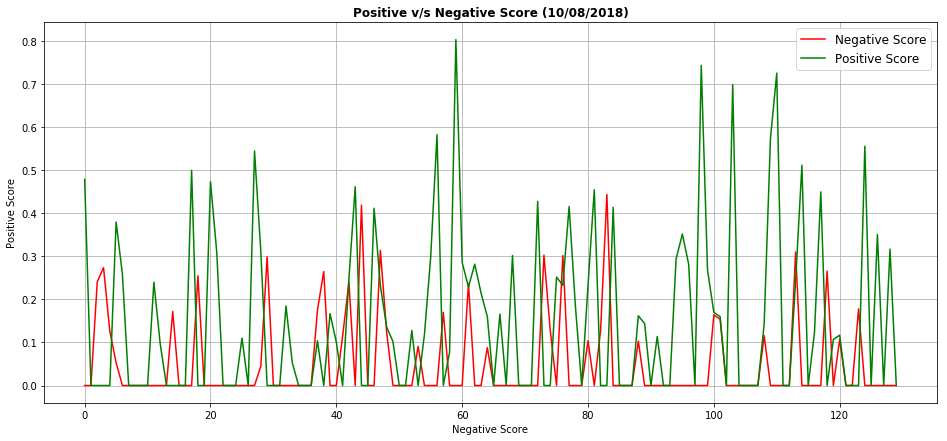

In [82]:
#plt.plot(tweets_table["Compound Score"],color = "b")
plt.plot(tweets_table["Negative Score"],color="r")
plt.plot(tweets_table["Positive Score"],color="g")
plt.rcParams["figure.figsize"] = [16,7]

#plt.plot(final_df["Stock_Date"],color ="b")
#plt.plot(final_df["Positive Score"],color ="g")

plt.title("Positive v/s Negative Score (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.ylabel("Positive Score")
plt.xlabel("Negative Score")
plt.grid(True)
plt.legend(loc="best", fontsize="large", fancybox=True)



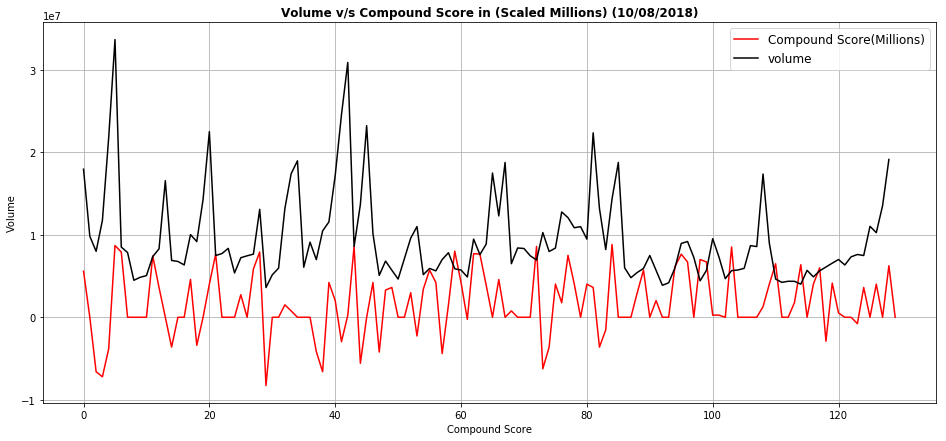

In [92]:


plt.plot(tweets_table["Compound Score(Millions)"],color="red")
plt.plot(index["volume"],color="black")
plt.rcParams["figure.figsize"] = [16,7]

plt.title("Volume v/s Compound Score in (Scaled Millions) (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.ylabel("Volume")
plt.xlabel("Compound Score")
plt.grid(True)
plt.legend(loc="best", fontsize="large", fancybox=True)



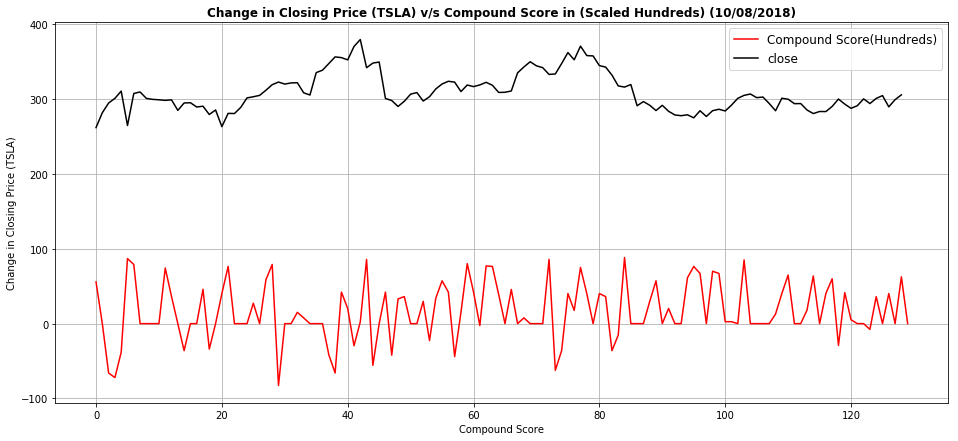

In [94]:


plt.plot(tweets_table["Compound Score(Hundreds)"],color="red")
plt.plot(sorted_tsla_df["close"],color="black")
plt.rcParams["figure.figsize"] = [16,7]

plt.title("Change in Closing Price (TSLA) v/s Compound Score in (Scaled Hundreds) (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.ylabel("Change in Closing Price (TSLA)")
plt.xlabel("Compound Score")
plt.grid(True)
plt.legend(loc="best", fontsize="large", fancybox=True)



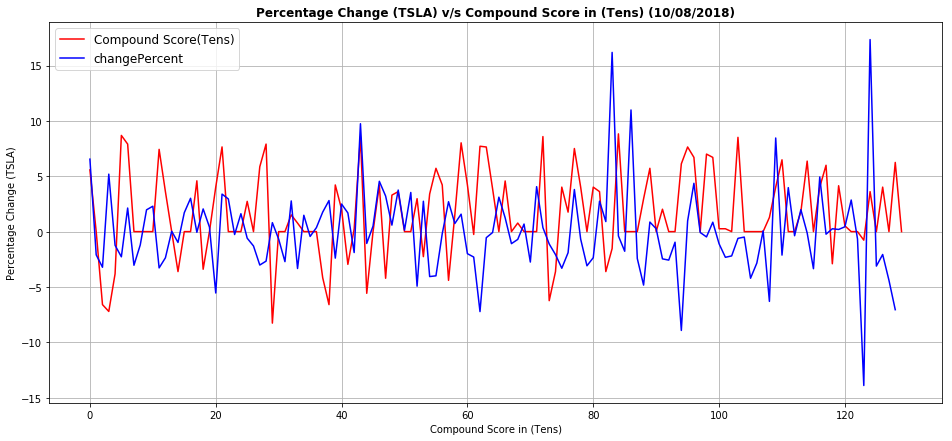

In [95]:


plt.plot(tweets_table["Compound Score(Tens)"],color="red")
plt.plot(tsla_df["changePercent"],color="b")
plt.rcParams["figure.figsize"] = [16,7]

plt.title("Percentage Change (TSLA) v/s Compound Score in (Tens) (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.ylabel("Percentage Change (TSLA)")
plt.xlabel("Compound Score in (Tens)")
plt.grid(True)
plt.legend(loc="best", fontsize="large", fancybox=True)



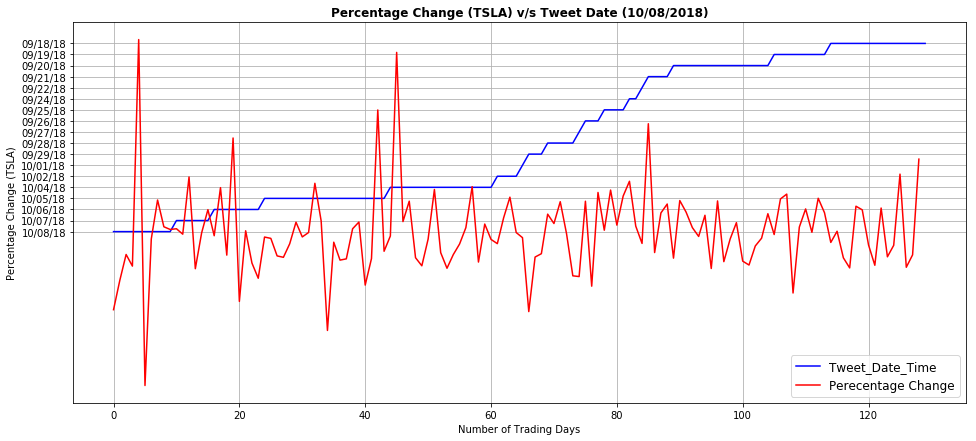

In [96]:
#Tweet Date vs Percentage Change

plt.plot(final_df["Tweet_Date_Time"],color="b")
plt.rcParams["figure.figsize"] = [16,7]

plt.title("Percentage Change (TSLA) v/s Compound Score in (Tens) (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.ylabel("Percentage Change (TSLA)")
plt.xlabel("Compound Score in (Tens)")
plt.grid(True)
plt.legend(loc="best", fontsize="large", fancybox=True)

plt.plot(final_df["Perecentage Change"],color="r")
plt.rcParams["figure.figsize"] = [16,7]

plt.title("Percentage Change (TSLA) v/s Tweet Date (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.ylabel("Percentage Change (TSLA)")
plt.xlabel("Number of Trading Days")
plt.grid(True)
plt.legend(loc="best", fontsize="large", fancybox=True)

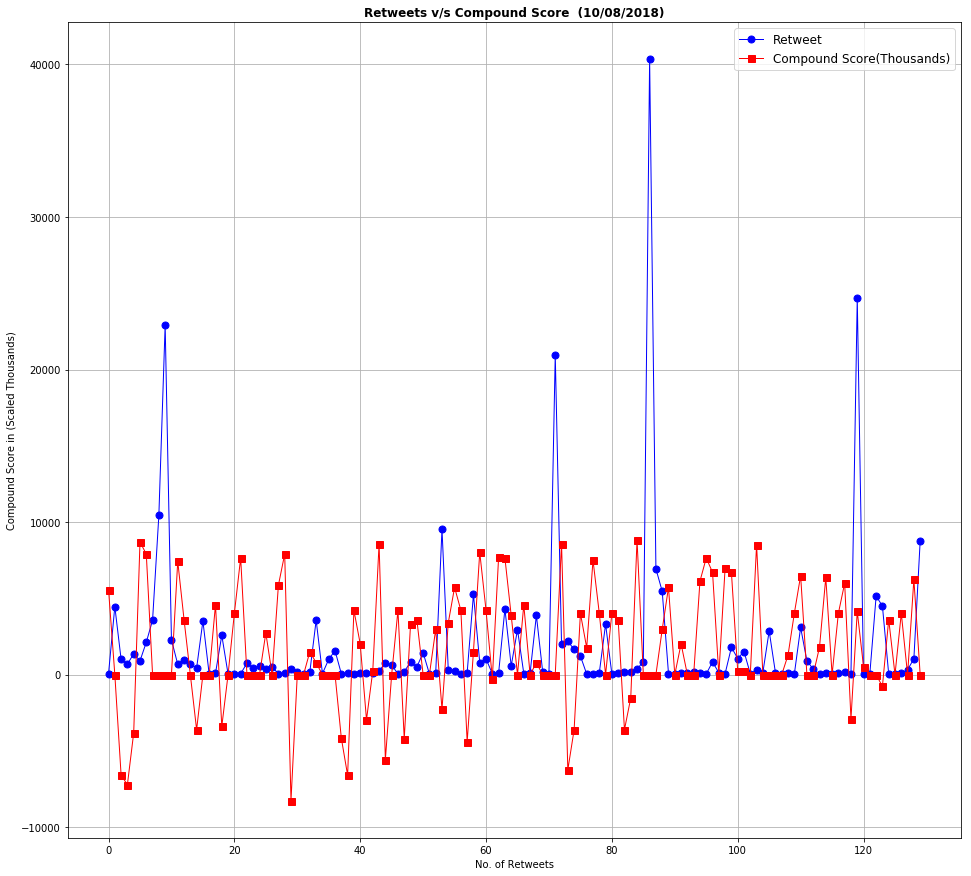

In [101]:
#
plt.plot(tweets_table["Retweet"], "bo", linestyle="-", markersize=7, linewidth=1)
plt.plot(tweets_table["Compound Score(Thousands)"], "rs", linestyle="-", markersize=7, linewidth=1)

plt.title("Retweets v/s Compound Score  (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.ylabel("Compound Score in (Scaled Thousands)")
plt.xlabel("No. of Retweets")
plt.grid(True)
plt.legend(loc="best", fontsize="large", fancybox=True)

# Save the Figure
#plt.savefig("analysis/Fig3.png")

# Show the Figure
plt.show()
#plt.plot(tweets_table["Retweet"],color="red")
#plt.plot(tweets_table["Comp_in_tenthousands"],color="blue")
plt.rcParams["figure.figsize"] = [16,15]



In [76]:
x_values = np.arange(len(compound_list)
tweets_table("Positive")
tweets_table['Negative Score'] = negative_list
tweets_table['Neutral Score'] = neutral_list)
plt.figure(figsize=(10, 10))
barlist=plt.bar(x_values, avg_sentiment_df["Avg_Compound_Score"], alpha=0.5, align='center', width=1)
plt.xticks(x_values, avg_sentiment_df["User"], rotation="horizontal")
plt.axhline(y=0, color = 'black')                  #adds a horizontal line at zero
for i in range(len(barlist)):
   barlist[i].set_color(colors[i])
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment Based on Twitter (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.savefig("Overall_Media_Sentiment.png")

SyntaxError: invalid syntax (<ipython-input-76-1aa63941790d>, line 2)